In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#loading the dataset

df = pd.read_csv('Laptops Price.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


### Preparing the dataset 

First, we'll normalize the names of the columns:

```python
df.columns = df.columns.str.lower().str.replace(' ', '_')
```

Now, instead of `'Final Price'`, we have `'final_price'`.

Next, use only the following columns:

* `'ram'`,
* `'storage'`,
* `'screen'`,
* `'final_price'`

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [5]:
selected_columns = ['ram',
'storage',
'screen',
'final_price']

laptops= df[selected_columns]
laptops.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


### EDA

* Look at the `final_price` variable. Does it have a long tail? 

<Axes: xlabel='final_price', ylabel='Count'>

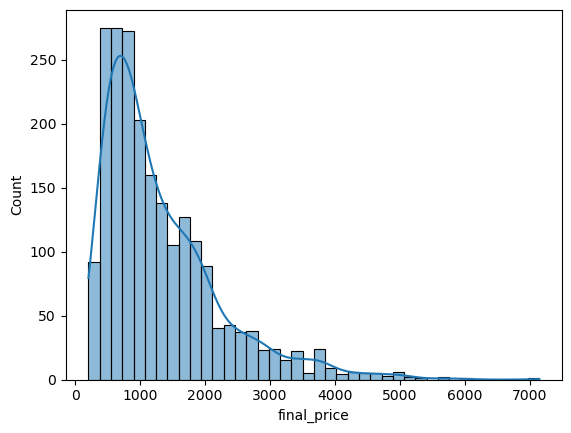

In [6]:
sns.histplot(laptops['final_price'], bins= 40, kde= True)

The `final_price` column has a long-tail

In [7]:
#statistical summary
laptops.final_price.describe()

count    2160.000000
mean     1312.638509
std       911.475417
min       201.050000
25%       661.082500
50%      1031.945000
75%      1708.970000
max      7150.470000
Name: final_price, dtype: float64

<Axes: xlabel='final_price', ylabel='Count'>

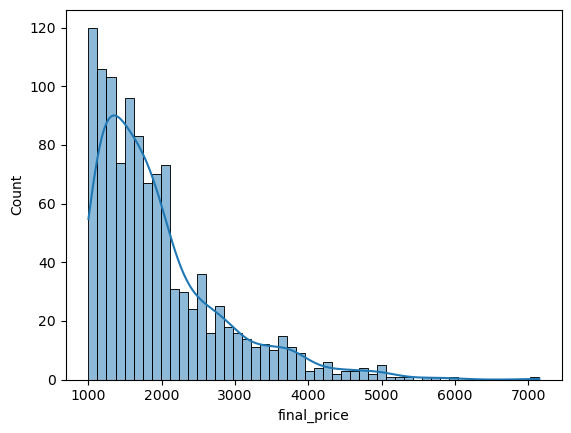

In [8]:
sns.histplot(laptops.final_price[laptops.final_price > 1000], bins= 50, kde=True)

In [9]:
#transforming using log function into normal distribution
price_log= np.log1p(laptops.final_price)
price_log

0       6.917706
1       5.703782
2       6.672033
3       7.090077
4       6.507293
          ...   
2155    7.901374
2156    7.972807
2157    8.131822
2158    7.550130
2159    7.438966
Name: final_price, Length: 2160, dtype: float64

<Axes: xlabel='final_price', ylabel='Count'>

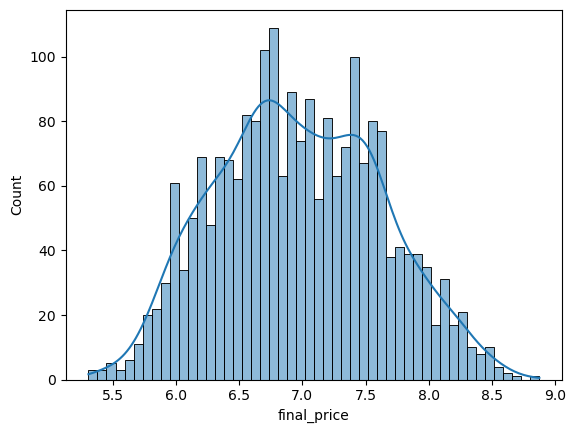

In [10]:
#visualization of transformed histogram
sns.histplot(price_log, bins=50, kde= True)

## Question 1

There's one column with missing values. What is it?

* `'ram'`
* `'storage'`
* `'screen'`
* `'final_price'`


In [11]:
laptops.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

The column `screen` has 4 missing values

### Question 2

What's the median (50% percentile) for variable `'ram'`?

- 8
- 16
- 24
- 32

In [12]:
laptops.ram.describe()

count    2160.000000
mean       15.413889
std         9.867815
min         4.000000
25%         8.000000
50%        16.000000
75%        16.000000
max       128.000000
Name: ram, dtype: float64

In [13]:
median= laptops.ram.median()
print(median)

16.0


Median for variable `ram` is 16.0

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures


In [14]:
def prepare_data(laptops, seed):
    # Shuffle the initial dataset using given seed value
    np.random.seed(42)

    n = len(df)
    idx = np.arange(n)
    np.random.shuffle(idx)

    laptops_shuffled = laptops.iloc[idx]

    # Split data in train/val/test sets, with 60%/20%/20% distribution
    n_test = int(0.2 * n)
    n_val = int(0.2 * n)
    n_train = n - (n_val + n_test)

    laptops_train = laptops_shuffled.iloc[:n_train].copy()
    laptops_val = laptops_shuffled.iloc[n_train:n_train + n_val].copy()
    laptops_test = laptops_shuffled.iloc[n_train + n_val:].copy()

    #y_train_original = laptops_train["final_price"].values
    #y_val_original = laptops_val["final_price"].values
    #y_test_original = laptops_test["final_price"].values


    # Apply the log transformation to the final_price variable using the np.log1p() function.
    y_train = np.log1p(laptops_train['final_price'].values)
    y_val = np.log1p(laptops_val['final_price'].values)
    y_test = np.log1p(laptops_test['final_price'].values)

    # Make sure that the target value (' final_price') is not in the dataframe
    del laptops_train['final_price']
    del laptops_val['final_price']
    del laptops_test['final_price']
    return laptops_train, laptops_val, laptops_test, y_train, y_val, y_test 

In [15]:
laptops_train, laptops_val, laptops_test, y_train, y_val, y_test = prepare_data(laptops, 42)

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [16]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [17]:
def prepare_X(laptops, missing_val_alt):
    laptops= laptops.fillna(missing_val_alt)
    X = laptops.values
    return X

In [18]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [19]:
# Prepare the data
X_train, X_val, X_test, y_train, y_val, y_test = prepare_data(laptops, seed=42)

# Prepare X for training (fill missing values with 0)
X_train = prepare_X(X_train, 0)

# Train the model
w_0, w = train_linear_regression(X_train, y_train)

# Prepare validation data and make predictions
X_val = prepare_X(X_val, 0)
y_pred = w_0 + X_val.dot(w)
rmse_value= rmse(y_val, y_pred).round(2)

print(f"RMSE: {rmse_value}")

RMSE: 0.43


In [20]:
# First, prepare the data using the prepare_data function
laptops_train, laptops_val, laptops_test, y_train, y_val, y_test = prepare_data(laptops, seed=42)

# Calculate the mean of 'screen' from the training data
mean = laptops_train['screen'].mean()

# Prepare X_train, filling missing values with the calculated mean
X_train = prepare_X(laptops_train, mean)

# Train the linear regression model
w_0, w = train_linear_regression(X_train, y_train)

# Prepare X_val, using the same mean from the training data
X_val = prepare_X(laptops_val, mean)

# Make predictions on the validation set
y_pred = w_0 + X_val.dot(w)

# Calculate and round the RMSE
rmse_value = rmse(y_val, y_pred).round(2)

print(f"RMSE: {rmse_value}")


RMSE: 0.43


Both are the same so both are equally good

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [21]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [22]:
# First, prepare the data using the prepare_data function
laptops_train, laptops_val, laptops_test, y_train, y_val, y_test = prepare_data(laptops, seed=42)

# Prepare X_train, filling missing values with 0
X_train = prepare_X(laptops_train, 0)

# Loop through different regularization values
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    # Train the regularized linear regression model
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    # Prepare X_val, filling missing values with 0
    X_val = prepare_X(laptops_val, 0)
    
    # Make predictions on the validation set
    y_pred = w_0 + X_val.dot(w)
    
    # Calculate and print RMSE for each regularization value
    print("For r = %5s, RMSE = %.2f" % (r, rmse(y_val, y_pred).round(2)))

For r =     0, RMSE = 0.43
For r = 1e-06, RMSE = 0.43
For r = 0.0001, RMSE = 0.43
For r = 0.001, RMSE = 0.43
For r =  0.01, RMSE = 0.43
For r =   0.1, RMSE = 0.43
For r =     1, RMSE = 0.43
For r =     5, RMSE = 0.46
For r =    10, RMSE = 0.51


The best `rsme` is 0.43 which corresponds with r=0

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176
> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [23]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []
for s in seeds:
    
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - n_val - n_test

    np.random.seed(s)

    idx = np.arange(n)
    np.random.shuffle(idx)

    laptops_shuffled = laptops.iloc[idx]

    laptops_train = laptops_shuffled.iloc[:n_train].copy()
    laptops_val = laptops_shuffled.iloc[n_train:n_train + n_val].copy()
    laptops_test = laptops_shuffled.iloc[n_train + n_val:].copy()

    #y_train_original = laptops_train["final_price"].values
    #y_val_original = laptops_val["final_price"].values
    #y_test_original = laptops_test["final_price"].values


    # Apply the log transformation to the price variable using the np.log1p() function.
    y_train = laptops_train['final_price'].values
    y_val = laptops_val['final_price'].values
    y_test = laptops_test['final_price'].values

    # Make sure that the target value ('price') is not in the dataframe
    del laptops_train['final_price']
    del laptops_val['final_price']
    del laptops_test['final_price']

    #Prepare X_train, filling missing values with 0
    X_train = prepare_X(laptops_train, 0)
    
    # Train the linear regression model
    w_0, w = train_linear_regression(X_train, y_train)

    # Prepare X_val, filling missing values with 0
    X_val = prepare_X(laptops_val, 0)
    
    # Make predictions on the validation set
    y_pred = w_0 + X_val.dot(w)
    
    # Calculate RMSE and append to the scores list
    rmse_scores.append(rmse(y_val, y_pred))

# Calculate and print the mean RMSE
mean_rmse = np.mean(rmse_scores)
print(f"Mean RMSE across {len(seeds)} seeds: {mean_rmse:.2f}")

# Calculate and print the standard deviation of RMSE
std_rmse = np.std(rmse_scores).round(3)
print(f"Standard deviation of RMSE: {std_rmse:.2f}")

Mean RMSE across 10 seeds: 589.54
Standard deviation of RMSE: 29.18


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 598.60
- 608.60
- 618.60
- 628.60

In [24]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []
for s in seeds:
    
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - n_val - n_test

    np.random.seed(9)

    idx = np.arange(n)
    np.random.shuffle(idx)

    laptops_shuffled = laptops.iloc[idx]

    laptops_train = laptops_shuffled.iloc[:n_train].copy()
    laptops_val = laptops_shuffled.iloc[n_train:n_train + n_val].copy()
    laptops_test = laptops_shuffled.iloc[n_train + n_val:].copy()

    #y_train_original = laptops_train["final_price"].values
    #y_val_original = laptops_val["final_price"].values
    #y_test_original = laptops_test["final_price"].values


    # Apply the log transformation to the price variable using the np.log1p() function.
    y_train = laptops_train['final_price'].values
    y_val = laptops_val['final_price'].values
    y_test = laptops_test['final_price'].values

    # Make sure that the target value ('price') is not in the dataframe
    del laptops_train['final_price']
    del laptops_val['final_price']
    del laptops_test['final_price']

    # Combine train and validation datasets
laptops_train_combined = pd.concat([laptops_train, laptops_val])
y_train_combined = np.concatenate((y_train, y_val), axis=0)

# Prepare X_train_combined, filling missing values with 0
X_train_combined = prepare_X(laptops_train_combined, 0)

# Train the regularized linear regression model
w_0, w = train_linear_regression_reg(X_train_combined, y_train_combined, r=0.001)

# Prepare X_test, filling missing values with 0
X_test = prepare_X(laptops_test, 0)

# Make predictions on the test set
y_pred = w_0 + X_test.dot(w)

# Calculate and print RMSE
rmse_value = rmse(y_test, y_pred).round(2)
print(f"RMSE on test set: {rmse_value}")

RMSE on test set: 608.61


The RMSE on test set is 608.61